credits for scraping code to McKay Johns
https://github.com/mckayjohns/youtube-videos/blob/main/code/sofascore%20scraping.ipynb

In [11]:
import requests

from bs4 import BeautifulSoup

import pandas as pd

In [2]:
response = requests.get(
    'https://www.sofascore.com/england-italy/hUbsnUb#10752547',
    headers={'User-Agent': 'Mozilla/5.0'} # you'll be blocked if you don't use some type of user agent
)

In [3]:
soup = BeautifulSoup(response.text, 'html.parser')
soup.select('g[cursor="pointer"]')

[]

In [4]:
# These are the headers we need to access the API
headers = {
    'authority': 'api.sofascore.com',
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    'dnt': '1',
    'if-none-match': 'W/"4bebed6144"',
    'origin': 'https://www.sofascore.com',
    'referer': 'https://www.sofascore.com/',
    'sec-ch-ua': '"Not.A/Brand";v="8", "Chromium";v="114"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36',
}

# you'll need to change the url to match the one you copied. As you can see they have some sort of match id to identify the game --> 10385636
response = requests.get('https://api.sofascore.com/api/v1/event/10752547/shotmap', headers=headers)

In [5]:
# If you make the request without doing anything else though you will get a 304 response
# which means "not modified"
response

<Response [200]>

In [6]:
shots = response.json()

In [7]:
shots

{'shotmap': [{'player': {'name': 'Giacomo Raspadori',
    'slug': 'giacomo-raspadori',
    'shortName': 'G. Raspadori',
    'position': 'F',
    'userCount': 3801,
    'id': 865651},
   'isHome': False,
   'shotType': 'block',
   'situation': 'assisted',
   'playerCoordinates': {'x': 9.1, 'y': 42.2, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'low-left',
   'goalMouthCoordinates': {'x': 0, 'y': 51.9, 'z': 19},
   'blockCoordinates': {'x': 7.3, 'y': 45.8, 'z': 0},
   'id': 2270883,
   'time': 90,
   'addedTime': 3,
   'timeSeconds': 5558,
   'draw': {'start': {'x': 42.2, 'y': 9.1},
    'block': {'x': 45.8, 'y': 7.3},
    'end': {'x': 48.1, 'y': 0},
    'goal': {'x': 48.1, 'y': 81}},
   'reversedPeriodTime': 1,
   'reversedPeriodTimeSeconds': 742,
   'incidentType': 'shot'},
  {'player': {'name': 'Moise Kean',
    'firstName': '',
    'lastName': '',
    'slug': 'moise-kean',
    'shortName': 'M. Kean',
    'position': 'F',
    'userCount': 6414,
    'id': 835601},
   '

In [12]:
df = pd.DataFrame(shots['shotmap'])

df.head()


,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,blockCoordinates,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType
0,"{'name': 'Giacomo Raspadori', 'slug': 'giacomo...",False,block,assisted,"{'x': 9.1, 'y': 42.2, 'z': 0}",right-foot,low-left,"{'x': 0, 'y': 51.9, 'z': 19}","{'x': 7.3, 'y': 45.8, 'z': 0}",2270883,90,3.0,5558,"{'start': {'x': 42.2, 'y': 9.1}, 'block': {'x'...",1,742,shot,NaN
1,"{'name': 'Moise Kean', 'firstName': '', 'lastN...",False,block,assisted,"{'x': 14, 'y': 33.3, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 48.5, 'z': 19}","{'x': 9.2, 'y': 39.2, 'z': 0}",2270880,90,3.0,5537,"{'start': {'x': 33.3, 'y': 14}, 'block': {'x':...",1,763,shot,NaN
2,"{'name': 'Moise Kean', 'firstName': '', 'lastN...",False,save,assisted,"{'x': 18.3, 'y': 45.3, 'z': 0}",right-foot,high-centre,"{'x': 0, 'y': 49, 'z': 20.3}","{'x': 1.1, 'y': 49.6, 'z': 0}",2270876,90,1.0,5402,"{'start': {'x': 45.3, 'y': 18.3}, 'block': {'x...",1,898,shot,NaN
3,"{'name': 'Harry Kane', 'firstName': '', 'lastN...",True,goal,regular,"{'x': 14.8, 'y': 60.6, 'z': 0}",right-foot,low-right,"{'x': 0, 'y': 48, 'z': 10.1}",NaN,2271212,77,NaN,4563,"{'start': {'x': 60.6, 'y': 14.8}, 'end': {'x':...",14,837,shot,regular
4,"{'name': 'Stephan El Shaarawy', 'slug': 'steph...",False,block,assisted,"{'x': 8.8, 'y': 43.5, 'z': 0}",head,low-right,"{'x': 0, 'y': 48.1, 'z': 19.4}","{'x': 6.6, 'y': 45.5, 'z': 0}",2270837,72,NaN,4279,"{'start': {'x': 43.5, 'y': 8.8}, 'block': {'x'...",19,1121,shot,NaN


In [13]:
england_shots = df.loc[df['isHome'] == True]
england_shots.head()

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,blockCoordinates,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType
3,"{'name': 'Harry Kane', 'firstName': '', 'lastN...",True,goal,regular,"{'x': 14.8, 'y': 60.6, 'z': 0}",right-foot,low-right,"{'x': 0, 'y': 48, 'z': 10.1}",NaN,2271212,77,NaN,4563,"{'start': {'x': 60.6, 'y': 14.8}, 'end': {'x':...",14,837,shot,regular
5,"{'name': 'Phil Foden', 'firstName': '', 'lastN...",True,save,assisted,"{'x': 19.3, 'y': 34.9, 'z': 0}",left-foot,low-centre,"{'x': 0, 'y': 48.7, 'z': 1.9}","{'x': 3.8, 'y': 49.6, 'z': 0}",2270826,68,NaN,4043,"{'start': {'x': 34.9, 'y': 19.3}, 'block': {'x...",23,1357,shot,NaN
6,"{'name': 'Marcus Rashford', 'slug': 'marcus-ra...",True,miss,assisted,"{'x': 20.7, 'y': 30.1, 'z': 0}",right-foot,high-right,"{'x': 0, 'y': 42.5, 'z': 66.7}",NaN,2270814,62,NaN,3691,"{'start': {'x': 30.1, 'y': 20.7}, 'end': {'x':...",29,1709,shot,NaN
10,"{'name': 'Marcus Rashford', 'slug': 'marcus-ra...",True,goal,fast-break,"{'x': 13.8, 'y': 42.3, 'z': 0}",right-foot,low-right,"{'x': 0, 'y': 47.2, 'z': 1.3}",NaN,2271211,57,NaN,3376,"{'start': {'x': 42.3, 'y': 13.8}, 'end': {'x':...",34,2024,shot,regular
12,"{'name': 'Kalvin Phillips', 'slug': 'kalvin-ph...",True,miss,assisted,"{'x': 23.8, 'y': 44.1, 'z': 0}",right-foot,close-high,"{'x': 0, 'y': 50.3, 'z': 56.9}",NaN,2270788,51,NaN,3031,"{'start': {'x': 44.1, 'y': 23.8}, 'end': {'x':...",40,2369,shot,NaN


In [14]:
italy_shots = df.loc[df['isHome'] == False]
italy_shots.head()

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,blockCoordinates,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType
0,"{'name': 'Giacomo Raspadori', 'slug': 'giacomo...",False,block,assisted,"{'x': 9.1, 'y': 42.2, 'z': 0}",right-foot,low-left,"{'x': 0, 'y': 51.9, 'z': 19}","{'x': 7.3, 'y': 45.8, 'z': 0}",2270883,90,3.0,5558,"{'start': {'x': 42.2, 'y': 9.1}, 'block': {'x'...",1,742,shot,NaN
1,"{'name': 'Moise Kean', 'firstName': '', 'lastN...",False,block,assisted,"{'x': 14, 'y': 33.3, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 48.5, 'z': 19}","{'x': 9.2, 'y': 39.2, 'z': 0}",2270880,90,3.0,5537,"{'start': {'x': 33.3, 'y': 14}, 'block': {'x':...",1,763,shot,NaN
2,"{'name': 'Moise Kean', 'firstName': '', 'lastN...",False,save,assisted,"{'x': 18.3, 'y': 45.3, 'z': 0}",right-foot,high-centre,"{'x': 0, 'y': 49, 'z': 20.3}","{'x': 1.1, 'y': 49.6, 'z': 0}",2270876,90,1.0,5402,"{'start': {'x': 45.3, 'y': 18.3}, 'block': {'x...",1,898,shot,NaN
4,"{'name': 'Stephan El Shaarawy', 'slug': 'steph...",False,block,assisted,"{'x': 8.8, 'y': 43.5, 'z': 0}",head,low-right,"{'x': 0, 'y': 48.1, 'z': 19.4}","{'x': 6.6, 'y': 45.5, 'z': 0}",2270837,72,NaN,4279,"{'start': {'x': 43.5, 'y': 8.8}, 'block': {'x'...",19,1121,shot,NaN
7,"{'name': 'Gianluca Scamacca', 'firstName': '',...",False,save,assisted,"{'x': 13.5, 'y': 35.9, 'z': 0}",right-foot,high-left,"{'x': 0, 'y': 52, 'z': 22.8}","{'x': 1.8, 'y': 49.5, 'z': 0}",2270813,61,NaN,3640,"{'start': {'x': 35.9, 'y': 13.5}, 'block': {'x...",30,1760,shot,NaN


In [15]:
england_shots['playerCoordinates'].iloc[0]['x']

14.8

In [16]:
#Load important libraries
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import pandas as pd
from pandas import json_normalize
import numpy as np

Text(0.5, 1.0, 'England Shots (to the left) and Italy Shots (to the right)')

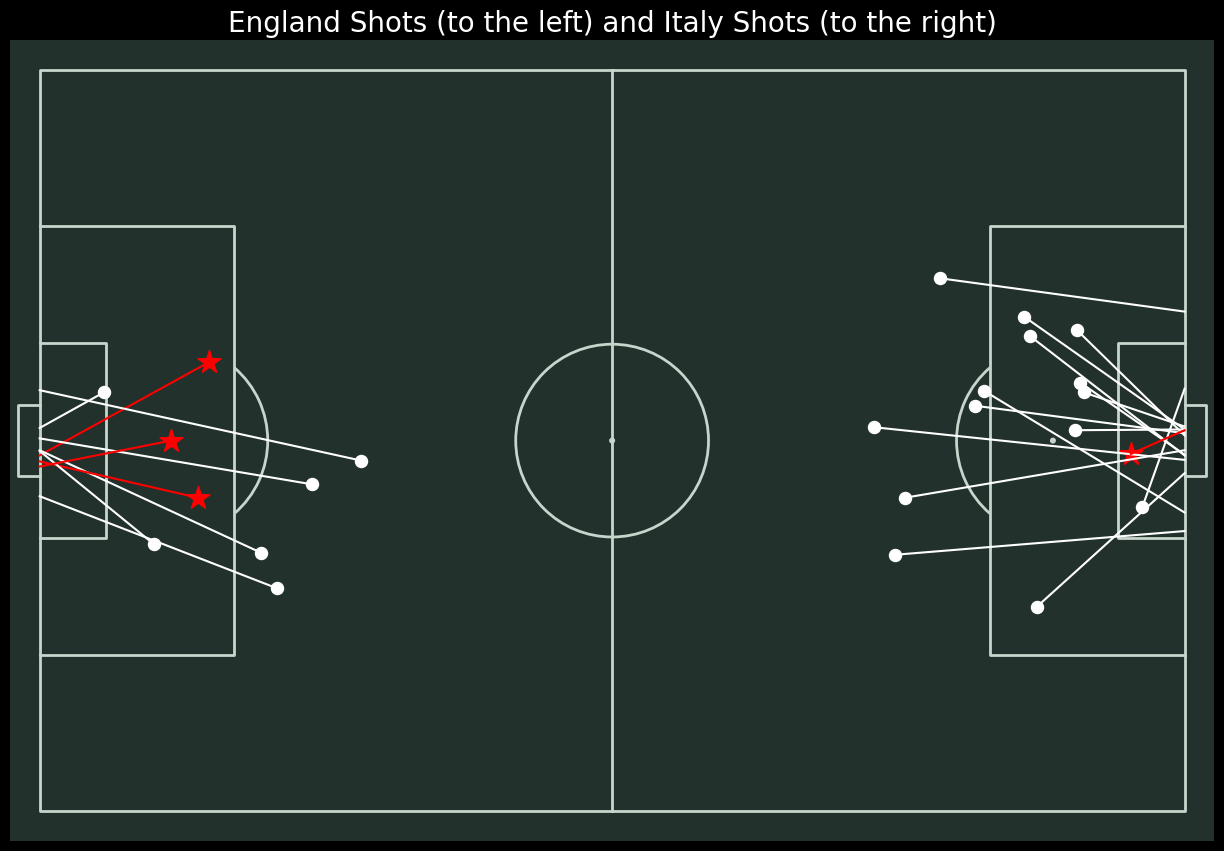

In [22]:
# Let's combine these 2 shot maps in one pitch
plt.style.use('dark_background')

fig, ax = plt.subplots(figsize=(15.6, 10.4))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch = Pitch(pitch_type='opta', positional=False, positional_color='#9A9A9A',
              pitch_color='#22312b', line_color='#c7d5cc', goal_type='box')

pitch.draw(ax=ax)

#plt.gca().invert_yaxis()

#for x in range(15):
for x in range(len(england_shots['id'])):

    if england_shots['shotType'].iloc[x] == 'goal':
        '''
        We can use the .plot() function to draw lines if we give it two pairs of coordinates:
        *First must contain the start and end X locations
        *Second gives the start and end Y locations
        For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
        '''
            
        plt.plot((england_shots['playerCoordinates'].iloc[x]['x'],england_shots['goalMouthCoordinates'].iloc[x]['x']),\
            (england_shots['playerCoordinates'].iloc[x]['y'],england_shots['goalMouthCoordinates'].iloc[x]['y']),color='red')
        plt.scatter(england_shots['playerCoordinates'].iloc[x]['x'],england_shots['playerCoordinates'].iloc[x]['y'], s=300, color='red', marker='*')
    else:
        plt.plot((england_shots['playerCoordinates'].iloc[x]['x'],england_shots['goalMouthCoordinates'].iloc[x]['x']),\
            (england_shots['playerCoordinates'].iloc[x]['y'],england_shots['goalMouthCoordinates'].iloc[x]['y']),color='white')
        plt.scatter(england_shots['playerCoordinates'].iloc[x]['x'],england_shots['playerCoordinates'].iloc[x]['y'], s=75, color='white')
    
#plt.title('England Shots',color='white',size=20)

for x in range(len(italy_shots['id'])):

    if italy_shots['shotType'].iloc[x] == 'goal':
        '''
        We can use the .plot() function to draw lines if we give it two pairs of coordinates:
        *First must contain the start and end X locations
        *Second gives the start and end Y locations
        For example, plt.plot([0,1],[2,3]) will plot a line from location (0,2) to (1,3)
        '''
            
        plt.plot((100-italy_shots['playerCoordinates'].iloc[x]['x'],100-italy_shots['goalMouthCoordinates'].iloc[x]['x']),\
            (100-italy_shots['playerCoordinates'].iloc[x]['y'],100-italy_shots['goalMouthCoordinates'].iloc[x]['y']),color='red')
        plt.scatter(100-italy_shots['playerCoordinates'].iloc[x]['x'],100-italy_shots['playerCoordinates'].iloc[x]['y'], s=300, color='red', marker='*')
    else:
        plt.plot((100-italy_shots['playerCoordinates'].iloc[x]['x'],100-italy_shots['goalMouthCoordinates'].iloc[x]['x']),\
            (100-italy_shots['playerCoordinates'].iloc[x]['y'],100-italy_shots['goalMouthCoordinates'].iloc[x]['y']),color='white')
        plt.scatter(100-italy_shots['playerCoordinates'].iloc[x]['x'],100-italy_shots['playerCoordinates'].iloc[x]['y'], s=75, color='white')
    
plt.title('England Shots (to the left) and Italy Shots (to the right)',color='white',size=20)